# Model training and evaluation

### Imports

In [1]:
import pandas as pd
import numpy as np
import sys
import os

current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

# from src.train_model import train_lstm_model
from src.train_model import LSTMTrainer, ModelTrainingContext
from src.time_series_forecasting import LSTMForecaster, ForecastingContext
from src.autoencoder import AutoencoderAnomalyDetector, AnomalyDetectionContext
from src.anomaly_detection import AnomalyDetector
from src.evaluate_model import evaluate_model, plot_anomaly_comparison

In [2]:
# Load the data
data_train = pd.read_csv("../data/processed/ec2_request_latency_system_failure_no_anomaly2_preprocessed_train.csv")
data_test = pd.read_csv("../data/processed/ec2_request_latency_system_failure_preprocessed_test.csv")

### LSTM training

In [3]:
# Initialize LSTM trainer
lstm_trainer = LSTMTrainer(time_steps=10)

# Create a training context
training_context = ModelTrainingContext(lstm_trainer)

In [4]:
# Train LSTM model
trained_model = training_context.execute_training(data_train, data_test)

Training Data Shape: X_train: (4005, 10, 1), y_train: (4005,)
Testing Data Shape: X_test: (4019, 10, 1), y_test: (4019,)
Epoch 1/20


c:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Predictive Maintenance System\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0627 - val_loss: 0.0158
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0192
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - val_loss: 0.0172
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0153 - val_loss: 0.0098
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0159 - val_loss: 0.0147
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0160 - val_loss: 0.0163
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0161 - val_loss: 0.0196
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0146 - val_loss: 0.0103
Epoch 9/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0150 - val_loss: 0.0106
Epoch 10/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - val_loss: 0.0126
Epoch 11/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0146 - val_loss: 0.0082
Epoch 12/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.

Model saved at ../notebooks/models/lstm_model.h5


### LSTM predicting

In [5]:
# Initialize forecaster
forecaster = LSTMForecaster()

In [6]:
# Create forecasting context
context = ForecastingContext(forecaster)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


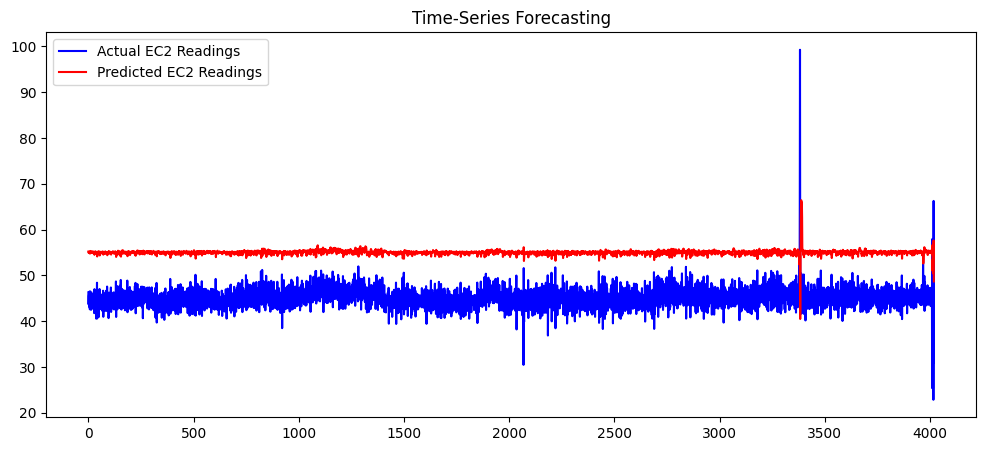

In [7]:
# Load your test dataset (ensure it has a 'value_normalized' column)
y_test, y_pred, y_thresh = context.run_forecast(data_test)

# Plot results
context.plot_results(y_test, y_pred)

### IsolationForest training

In [8]:
# # Initialize detector
# detector = AnomalyDetector()

In [9]:
# Fit and predict
# data = detector.fit_predict(data, "value_normalized")

In [10]:
# Plot anomalies
# detector.plot_anomalies(data, "value_normalized")

In [11]:
# data

In [12]:
# data.columns

### Autoencoders

In [13]:
# Initialize Autoencoder detector
autoencoder_detector = AutoencoderAnomalyDetector(encoding_dim=32)

In [14]:
# Create a training context
anomaly_detection_context = AnomalyDetectionContext(autoencoder_detector)

In [15]:
# Train Autoencoder
trained_autoencoder = anomaly_detection_context.execute_training(data_train)

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0124 - val_loss: 0.0099
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102 - val_loss: 0.0068
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 6.6012e-04
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4197e-04 - val_loss: 2.6435e-04
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6297e-04 - val_loss: 1.4772e-04
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4739e-04 - val_loss: 1.2170e-04
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0597e-04 - val_loss: 1.1451e-04
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5195e-04 - val_loss: 1.0971e-04
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2839e-04 - val_loss: 1.0584e-04


Autoencoder model saved at ../notebooks/models/autoencoder.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


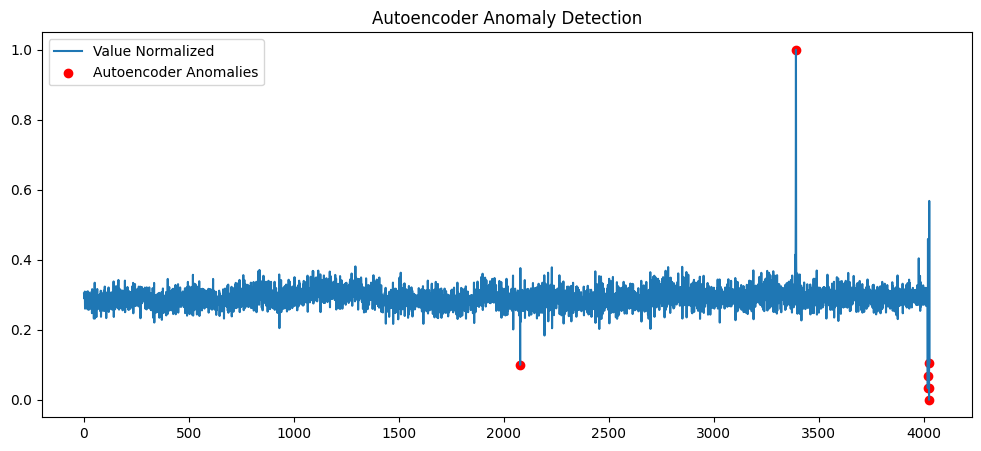

In [16]:
# Detect anomalies in test data
data_test, mse, threshold = anomaly_detection_context.execute_detection(data_test)

# Plot anomalies
autoencoder_detector.plot_anomalies(data_test)

In [17]:
data_test

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,value_fft_imag,value_lag_1,value_lag_2,value_lag_3,hour,day,month,weekday,value_normalized,autoencoder_anomaly
0,2014-03-07 03:56:00,46.030,45.521000,2.111571,-1.147150,2.226381,45.5210,47.606,42.580,115.582759,471.250595,42.580,47.606,45.868,3,7,3,4,0.303283,0
1,2014-03-07 04:01:00,44.992,45.415200,1.843914,-0.799258,1.501245,45.4152,47.606,42.580,296.162474,-281.344680,46.030,42.580,47.606,4,7,3,4,0.289694,0
2,2014-03-07 04:06:00,45.238,45.385667,1.650832,-0.721778,1.904545,45.2892,47.606,42.580,-598.509604,-223.277499,44.992,46.030,42.580,4,7,3,4,0.292915,0
3,2014-03-07 04:11:00,45.752,45.438000,1.513344,-0.870709,2.520237,44.9184,46.030,42.580,295.483726,281.207942,45.238,44.992,46.030,4,7,3,4,0.299644,0
4,2014-03-07 04:16:00,46.476,45.567750,1.448350,-1.100148,2.720187,45.6976,46.476,44.992,182.952678,18.691277,45.752,45.238,44.992,4,7,3,4,0.309122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2014-03-21 03:21:00,25.352,42.006800,11.906988,-0.370085,-1.067232,38.6712,57.958,25.352,-598.509604,223.277499,56.572,28.052,57.958,3,21,3,4,0.032572,1
4025,2014-03-21 03:26:00,38.216,41.314400,11.905863,-0.158846,-1.162753,41.2300,57.958,25.352,296.162474,281.344680,25.352,56.572,28.052,3,21,3,4,0.200984,0
4026,2014-03-21 03:31:00,22.864,39.145000,13.159617,0.121923,-1.564043,34.2112,56.572,22.864,115.582759,-471.250595,38.216,25.352,56.572,3,21,3,4,0.000000,1
4027,2014-03-21 03:36:00,66.260,41.393600,15.712038,0.241173,-1.498676,41.8528,66.260,22.864,-1074.202388,-565.070418,22.864,38.216,25.352,3,21,3,4,0.568129,0


In [18]:
# # Add Anomalies to DataFrame
# data["autoencoder_anomaly"] = anomalies.astype(int)

# # Plot Results
# autoencoder.plot_anomalies(data["value"], data["autoencoder_anomaly"])

In [19]:
# data

### Detecting the times for possible maintainance

In [20]:
# Define Threshold for Predicted Failures
threshold = np.percentile(y_thresh, 95)

In [21]:
# Flag High-Risk Periods Based on LSTM & Isolation Forest
data_test["predicted_failure"] = (data_test["value_normalized"] > threshold).astype(int)

In [22]:
data_test["predicted_failure"].value_counts()

predicted_failure
0    4024
1       5
Name: count, dtype: int64

In [23]:
threshold

np.float32(0.42830133)

In [24]:
# Final Alert Column: 1 = Maintenance Needed
data_test["maintenance_alert"] = data_test["autoencoder_anomaly"] | data_test["predicted_failure"]

In [25]:
# Print Alerts
alerts = data_test[data_test["maintenance_alert"] == 1]
print(f"🚨 Maintenance Alerts 🚨\n{alerts[['timestamp', 'value_normalized', 'maintenance_alert']]}")

🚨 Maintenance Alerts 🚨
                timestamp  value_normalized  maintenance_alert
2078  2014-03-14 09:06:00          0.099733                  1
3391  2014-03-18 22:36:00          0.560536                  1
3392  2014-03-18 22:41:00          1.000000                  1
4020  2014-03-21 03:01:00          0.033489                  1
4021  2014-03-21 03:06:00          0.459442                  1
4022  2014-03-21 03:11:00          0.067920                  1
4023  2014-03-21 03:16:00          0.441297                  1
4024  2014-03-21 03:21:00          0.032572                  1
4026  2014-03-21 03:31:00          0.000000                  1
4027  2014-03-21 03:36:00          0.568129                  1
4028  2014-03-21 03:41:00          0.106017                  1


In [26]:
data_test

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,...,value_lag_2,value_lag_3,hour,day,month,weekday,value_normalized,autoencoder_anomaly,predicted_failure,maintenance_alert
0,2014-03-07 03:56:00,46.030,45.521000,2.111571,-1.147150,2.226381,45.5210,47.606,42.580,115.582759,...,47.606,45.868,3,7,3,4,0.303283,0,0,0
1,2014-03-07 04:01:00,44.992,45.415200,1.843914,-0.799258,1.501245,45.4152,47.606,42.580,296.162474,...,42.580,47.606,4,7,3,4,0.289694,0,0,0
2,2014-03-07 04:06:00,45.238,45.385667,1.650832,-0.721778,1.904545,45.2892,47.606,42.580,-598.509604,...,46.030,42.580,4,7,3,4,0.292915,0,0,0
3,2014-03-07 04:11:00,45.752,45.438000,1.513344,-0.870709,2.520237,44.9184,46.030,42.580,295.483726,...,44.992,46.030,4,7,3,4,0.299644,0,0,0
4,2014-03-07 04:16:00,46.476,45.567750,1.448350,-1.100148,2.720187,45.6976,46.476,44.992,182.952678,...,45.238,44.992,4,7,3,4,0.309122,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2014-03-21 03:21:00,25.352,42.006800,11.906988,-0.370085,-1.067232,38.6712,57.958,25.352,-598.509604,...,28.052,57.958,3,21,3,4,0.032572,1,0,1
4025,2014-03-21 03:26:00,38.216,41.314400,11.905863,-0.158846,-1.162753,41.2300,57.958,25.352,296.162474,...,56.572,28.052,3,21,3,4,0.200984,0,0,0
4026,2014-03-21 03:31:00,22.864,39.145000,13.159617,0.121923,-1.564043,34.2112,56.572,22.864,115.582759,...,25.352,56.572,3,21,3,4,0.000000,1,0,1
4027,2014-03-21 03:36:00,66.260,41.393600,15.712038,0.241173,-1.498676,41.8528,66.260,22.864,-1074.202388,...,38.216,25.352,3,21,3,4,0.568129,0,1,1


In [27]:
# data['is_anomaly'] = data['anomaly_score'] == -1

In [28]:
# data

In [29]:
import json

# Load labels from the JSON file
with open("../data/raw/combined_labels.json", "r") as f:
    labels = json.load(f)

# Extract anomaly timestamps for the current dataset
dataset_name = "realKnownCause/ec2_request_latency_system_failure.csv"
anomaly_timestamps = labels.get(dataset_name, [])
print(f"Anomalies: {anomaly_timestamps}")

Anomalies: ['2014-03-14 09:06:00', '2014-03-18 22:41:00', '2014-03-21 03:01:00']


In [30]:
# Create 'is_true_anomaly' column and initialize it to 0
data_test['is_true_anomaly'] = False

# Update 'is_true_anomaly' to 1 where timestamps match anomaly_timestamps
for timestamp in anomaly_timestamps:
  data_test.loc[data_test['timestamp'] == timestamp, 'is_true_anomaly'] = True

In [31]:
data_test

,timestamp,value,value_mean,value_std_dev,value_skewness,value_kurtosis,value_rolling_mean,value_rolling_max,value_rolling_min,value_fft_real,...,value_lag_3,hour,day,month,weekday,value_normalized,autoencoder_anomaly,predicted_failure,maintenance_alert,is_true_anomaly
0,2014-03-07 03:56:00,46.030,45.521000,2.111571,-1.147150,2.226381,45.5210,47.606,42.580,115.582759,...,45.868,3,7,3,4,0.303283,0,0,0,False
1,2014-03-07 04:01:00,44.992,45.415200,1.843914,-0.799258,1.501245,45.4152,47.606,42.580,296.162474,...,47.606,4,7,3,4,0.289694,0,0,0,False
2,2014-03-07 04:06:00,45.238,45.385667,1.650832,-0.721778,1.904545,45.2892,47.606,42.580,-598.509604,...,42.580,4,7,3,4,0.292915,0,0,0,False
3,2014-03-07 04:11:00,45.752,45.438000,1.513344,-0.870709,2.520237,44.9184,46.030,42.580,295.483726,...,46.030,4,7,3,4,0.299644,0,0,0,False
4,2014-03-07 04:16:00,46.476,45.567750,1.448350,-1.100148,2.720187,45.6976,46.476,44.992,182.952678,...,44.992,4,7,3,4,0.309122,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2014-03-21 03:21:00,25.352,42.006800,11.906988,-0.370085,-1.067232,38.6712,57.958,25.352,-598.509604,...,57.958,3,21,3,4,0.032572,1,0,1,False
4025,2014-03-21 03:26:00,38.216,41.314400,11.905863,-0.158846,-1.162753,41.2300,57.958,25.352,296.162474,...,28.052,3,21,3,4,0.200984,0,0,0,False
4026,2014-03-21 03:31:00,22.864,39.145000,13.159617,0.121923,-1.564043,34.2112,56.572,22.864,115.582759,...,56.572,3,21,3,4,0.000000,1,0,1,False
4027,2014-03-21 03:36:00,66.260,41.393600,15.712038,0.241173,-1.498676,41.8528,66.260,22.864,-1074.202388,...,25.352,3,21,3,4,0.568129,0,1,1,False


In [32]:
sum(data_test['is_true_anomaly'])

3

In [33]:
# y_pred = data['is_anomaly']
y_pred = data_test['maintenance_alert']

# Ground truth: 1 for anomaly, 0 for normal
y_true = data_test['is_true_anomaly']

In [34]:
y_pred = y_pred.astype(bool)

In [35]:
y_true

0       False
1       False
2       False
3       False
4       False
        ...  
4024    False
4025    False
4026    False
4027    False
4028    False
Name: is_true_anomaly, Length: 4029, dtype: bool

### Evaluating the model

In [36]:
evaluate_model(y_true, y_pred)

Precision: 0.2727272727272727
Recall: 1.0
F1-Score: 0.42857142857142855


(0.2727272727272727, 1.0, 0.42857142857142855)

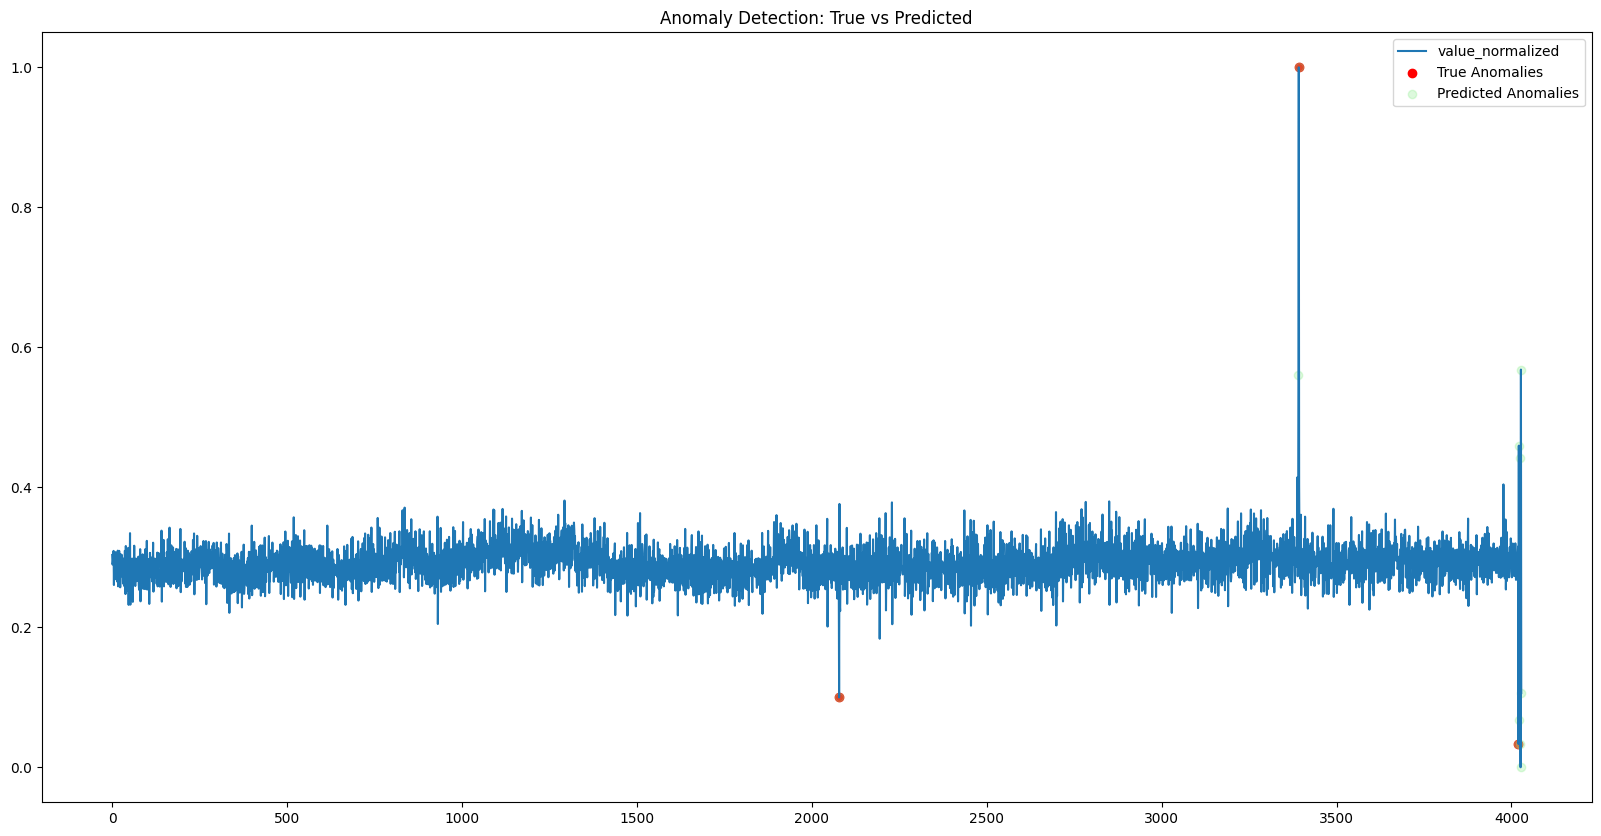

In [37]:
plot_anomaly_comparison(data_test, y_true, y_pred)

In [ ]:
# data['value'][data['is_true_anomaly'] == 1]

NameError: name 'data' is not defined